# Python으로 Crawling하기



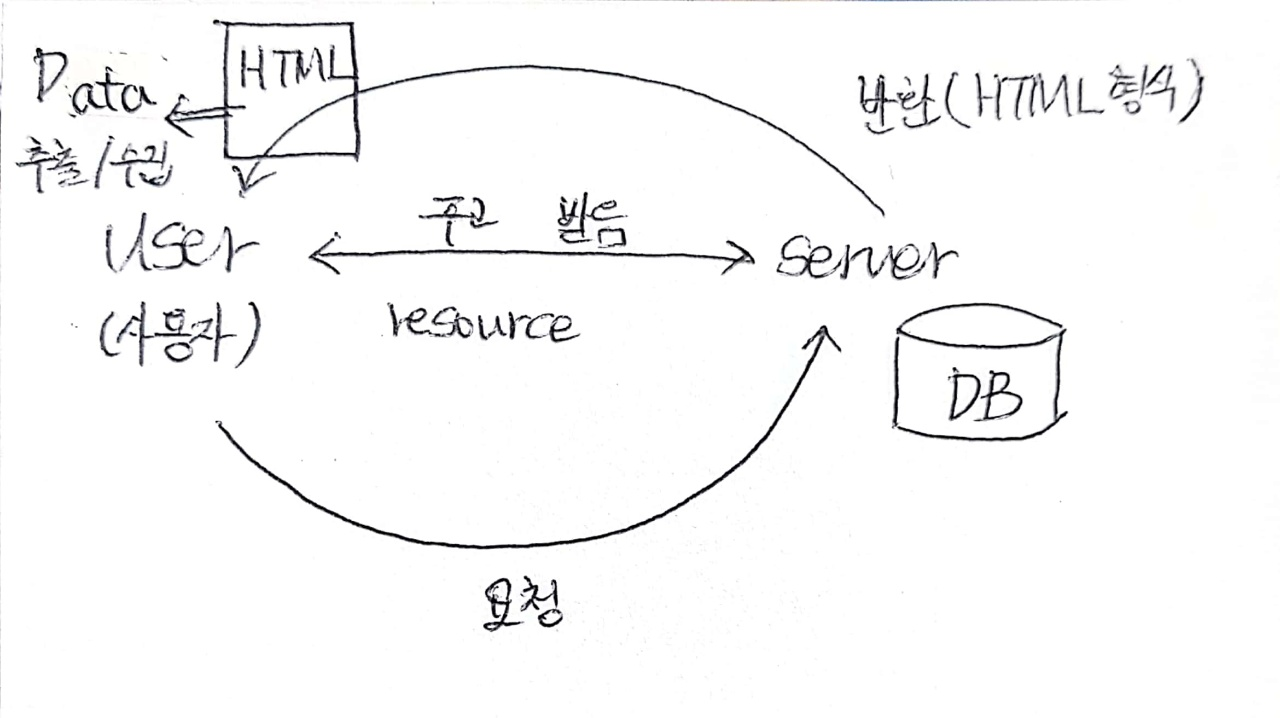

In [14]:
from IPython.display import Image
Image('C:/Users/user/Desktop/Python/Pandas_Analysis/사진/크롤링1.jpg')

* 스크랩핑: 웹 문서 상의 데이터를 가져오는 것
    - 웹은 여러 개의 페이지로 구성되어 있다.
    - 여러 페이지를 오고 가면서 데이터를 수집해야 한다.
    - 웹 형식은 HTML이다.
    
    
* web pasing: 스크랩핑할 때 web pasing된 자료를 가져온다.
    - Crawling: 웹 또는 어플리케이션 개발 단계, 개발된 프로그램을 테스트 하는 용도, 데이터를 자동으로 웹에서 수집 및 저장하는 것
    - 웹 데이터 수집 시, 자동으로 페이지를 넘어 다니면서 데이터 수집(Scraping + Crawling)
    
    
* 사용하는 라이브러리
    - Pandas:데이터 전처리              
    - Selenium: Crawling (+ chrome driver)
    - Request: 웹 크롤링할 때 동원됨    
    - Urllib: 사진 데이터를 Scrap + save

#### 기본 사용법

In [1]:
from selenium import webdriver

In [3]:
# 웹 브라우저 생성(가상의 웹 서비스 창)
driver = webdriver.Chrome('chromedriver')

In [3]:
# 웹 브라우저 종료
driver.quit()

## 예제1. E-mart 물품데이터 크롤링

#### 웹사이트 접속

In [4]:
# chromedriver 응용 프로그램 이용 --> 웹 접근
driver = webdriver.Chrome('chromedriver')

# 특정 사이트 접속
driver.get('http://emart.ssg.com/')

#### 세부 페이지 접속 및 데이터 추출

In [15]:
## 도구 더보기 --> 개발자 도구
driver.find_element_by_xpath('//*[@id="e_gnb"]/div/div[1]/div[2]/ul[1]/li[9]/a').click()

In [6]:
driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[2]/div/a/em[1]').text

'피코크 프레스드오렌지 900ml'

In [7]:
driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[3]/div/em').text

'6,980'

하지만 매번 함수를 입력해서 데이터를 가져오는 것은 비효율적이다.

따라서 **for문을 이용해서 한꺼번에 데이터를 가져오도록** 할 수 있다.

우선 페이지가 어떻게 구성되어 있는지 확인해야 한다.

#### 태크 상의 규칙 파악

In [8]:
# 1페이지의 첫 번째 상품명 태그
##'//*[@id="ty_thmb_view"]/ul/li[1]/div[2]/div[2]/div/a/em[1]'

# 1페이지의 마지막 상품명 태그
##'//*[@id="ty_thmb_view"]/ul/li[80]/div[2]/div[2]/div/a/em[1]'

두 태그의 차이점은 li[1]와 li[80]이다.

사이 숫자값이 바뀔 때마다 데이터의 순서가 바뀌는 것을 알 수 있다.

#### 한 페이지의 데이터 한 번에 가져오기

In [47]:
# 상품명과 상품 가격 리스트에 추가
product_list = []
price_list = []

for i in range(1,81):
    product_name = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
    price = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
    product_list.append(product_name.text)
    price_list.append(price.text)

In [48]:
import pandas as pd

In [49]:
df1 = pd.DataFrame({'상품명':product_list, '가격':price_list})
df1.head()

In [12]:
df1.to_excel('result1.xlsx')

#### 이미지 데이터 가져오기

지금까지와 동일한 방법으로 이미지 태그를 가져오면 된다.

이미지를 선택하고 나타난 태그의 바로 아래 태크를 Copy한다.

In [13]:
image1 = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li[1]/div[1]/div[2]/a/img[1]')
image1.get_attribute('src')

'http://item.ssgcdn.com/12/35/56/item/1000032563512_i1_290.jpg'

위 링크는 이미지가 있는 서버 내 주소를 뜻한다.

서버에서는 이미지와 같은 비정형 데이터를 url 형태로 저장하고 있다.

In [14]:
for i in range(1,81):
    image1 = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
    img_url = image1.get_attribute('src')
    print(img_url)

http://item.ssgcdn.com/12/35/56/item/1000032563512_i1_290.jpg
http://item.ssgcdn.com/28/16/98/item/1000019981628_i1_290.jpg
http://item.ssgcdn.com/63/64/90/item/1000047906463_i1_290.jpg
http://item.ssgcdn.com/86/77/60/item/1000012607786_i1_290.jpg
http://item.ssgcdn.com/90/04/04/item/0000008040490_i1_290.jpg
http://item.ssgcdn.com/77/75/36/item/1000029367577_i1_290.jpg
http://item.ssgcdn.com/17/29/63/item/1000022632917_i1_290.jpg
http://item.ssgcdn.com/23/83/85/item/1000007858323_i1_290.jpg
http://item.ssgcdn.com/45/96/97/item/1000021979645_i1_290.jpg
http://item.ssgcdn.com/25/95/60/item/0000006609525_i1_290.jpg
http://item.ssgcdn.com/00/38/85/item/1000005853800_i1_290.jpg
http://item.ssgcdn.com/25/97/92/item/1000010929725_i1_290.jpg
http://item.ssgcdn.com/00/85/67/item/1000004678500_i1_290.jpg
http://item.ssgcdn.com/46/36/27/item/1000028273646_i1_290.jpg
http://item.ssgcdn.com/99/84/67/item/1000004678499_i1_290.jpg
http://item.ssgcdn.com/63/49/23/item/1000043234963_i1_290.jpg
http://i

#### 이미지를 컴퓨터에 저장

In [15]:
import urllib.request

In [36]:
for i in range(1,81):
    image1 = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
    img_url = image1.get_attribute('src')
    print(img_url)
    urllib.request.urlretrieve(img_url, 'image_data/image'+str(i)+'.png')

http://item.ssgcdn.com/46/07/33/item/1000015330746_i1_290.jpg
http://item.ssgcdn.com/75/07/33/item/1000015330775_i1_290.jpg
http://item.ssgcdn.com/46/62/97/item/0000008976246_i1_290.jpg
http://item.ssgcdn.com/78/47/31/item/1000015314778_i1_290.jpg
http://item.ssgcdn.com/61/89/16/item/1000027168961_i1_290.jpg
http://item.ssgcdn.com/59/08/89/item/1000033890859_i1_290.jpg
http://item.ssgcdn.com/35/02/18/item/2097001180235_i1_290.jpg
http://item.ssgcdn.com/28/60/61/item/0000006616028_i1_290.jpg
http://item.ssgcdn.com/14/85/81/item/1000065818514_i1_290.jpg
http://item.ssgcdn.com/47/41/91/item/1000029914147_i1_290.jpg
http://item.ssgcdn.com/20/19/02/item/0000007021920_i1_290.jpg
http://item.ssgcdn.com/66/38/61/item/0000006613866_i1_290.jpg
http://item.ssgcdn.com/86/61/17/item/1000049176186_i1_290.jpg
http://item.ssgcdn.com/11/40/03/item/0000010034011_i1_290.jpg
http://item.ssgcdn.com/20/39/23/item/1000016233920_i1_290.jpg
http://item.ssgcdn.com/33/14/07/item/1000060071433_i1_290.jpg
http://i

In [ ]:
# driver.find_element_by_xpath('//*[@id="area_itemlist"]/div[2]/a[1]').click()
# 10페이지 태그: '//*[@id="area_itemlist"]/div[2]/a[9]'

#### 여러 페이지의 데이터를 한 번에 가져오기(+ try 문)

In [40]:
# 시간을 지연시키는 함수
driver.implicitly_wait(10)

다음 페이지가 띄어질 때까지 최대 10초까지 기다리는 함수

In [51]:
product_list = []
price_list = []

for j in range(1,10):
    for i in range(1,81):
        product_name = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
        price = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
        product_list.append(product_name.text)
        price_list.append(price.text)
        
    driver.find_element_by_xpath('//*[@id="area_itemlist"]/div[2]/a['+str(j)+']').click()

데이터 수집을 할 때 데이터가 비어있는 경우에 오류가 발생할 수 있다.

이때 아래 구문을 이용해서 오류를 건너띌 수 있다.

In [54]:
try:
    print('문장1')
    
except: # 오류 발생 시 출력하는 구문
    print('오류1')
    
finally:
    print('종료1')

문장1
종료1


In [55]:
try:
    print('문장1')
    ㅇㄹㄴㄹㅇ
    print('문장2')
except: # 오류 발생 시 출력하는 구문
    print('오류1')
    
finally:
    print('종료1')

문장1
오류1
종료1


try문에서 오류가 발견돼서 '문장2'가 출력되지 않고 '오류1'이 출력된다.

In [ ]:
product_list = []
price_list = []

for j in range(1,10):
    for i in range(1,81):
        try:
            product_name = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
            price = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
            product_list.append(product_name.text)
            price_list.append(price.text)
        
        except Exception as e: # 오류가 발생하면 오류메시지 'e'를 출력해라.
            print(e)
        
        finally:
            pass
       
    driver.find_element_by_xpath('//*[@id="area_itemlist"]/div[2]/a['+str(j)+']').click()

#### 전체 코드

In [58]:
driver = webdriver.Chrome('chromedriver')
driver.get('http://emart.ssg.com/')
driver.find_element_by_xpath('//*[@id="e_gnb"]/div/div[1]/div[2]/ul[1]/li[9]/a').click()

driver.implicitly_wait(10)

product_list = []
price_list = []

for j in range(1,10):
    for i in range(1,81):
        try:
            product_name = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[2]/div/a/em[1]')
            price = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[2]/div[3]/div/em')
            image1 = driver.find_element_by_xpath('//*[@id="ty_thmb_view"]/ul/li['+str(i)+']/div[1]/div[2]/a/img[1]')
            img_url = image1.get_attribute('src')
            urllib.request.urlretrieve(img_url, 'image_data/'+str(j)+'image'+str(i)+'.png')
            product_list.append(product_name.text)
            price_list.append(price.text)
        
        except Exception as e: # 오류가 발생하면 오류메시지 'e'를 출력해라.
            print(e)
        
        finally:
            pass
       
    driver.find_element_by_xpath('//*[@id="area_itemlist"]/div[2]/a['+str(j)+']').click()
    print(j, 'page Done')
    
driver.quit()

1 page Done
2 page Done
3 page Done
4 page Done
5 page Done
6 page Done
7 page Done
8 page Done
9 page Done


In [59]:
df1 = pd.DataFrame({'상품명':product_list, '가격':price_list})
df1.to_excel('result2.xlsx')

In [60]:
df1

,상품명,가격
0,삼다수 2L,980
1,삼다수 500ml,430
2,[롯데] 아이시스 8.0 2L,680
3,[농심] 백산수 2L,780
4,초정탄산수 1.5L,980
...,...,...
715,[본사직영] 롯데 칠성사이다 190m캔 x 30입,"11,610"
716,유기농 타트체리 착즙 주스 980ml,"16,900"
717,따옴 애플망고 235ml,"1,800"
718,롯데칠성 펩시콜라 제로 500ml 펫 x 20개입,"21,330"
